# HO01.1: Similaridade Textual
**Vencimento** Terça-feira por 7:00 <br>
**Pontos** 5 <br>
Esta é a tarefa **HO01: Similaridade Textual**, uma atividade prática que estimula o aluno a desenvolver habilidades de programação em linguagem Python para processamento textual.

## Problema
Calcular a similaridade entre cada par de documentos no coleção headlines.txt (um documento por linha):

1. Pré-processar cada documento para tokenizar, remover acentos e caracteres especiais, fazer lematização e stemming;
2. Criar a representação vetorial de 5 formas diferentes: Onehot Encoding, Counting Vectors, TF-IDF, Co-occurrence Vectors, Word2Vec;
3. Calcular a similaridade par-a-par usando 2 formas diferentes: Euclidean, Cosine

## Pré-requisitos
- pip install nltk
- pip install sklearn
- pip install gensim

In [51]:
# Bibliotecas necessárias, funções que só precisam ser executadas uma vez e carregar o arquivo de texto
import re
import nltk
from nltk.tokenize import word_tokenize
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

import pandas as pd
from IPython.display import display
from colorama import Fore, Back, Style       #prints coloridos e estilizados no terminal
import numpy as np
import seaborn as sns
# Bibliotecas da parte 2
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Binarizer
from gensim.models import Word2Vec

#Bibliotecas da parte 3
import numpy as np
from scipy.spatial.distance import euclidean, cosine


# Baixar os recursos do NLTK necessários (apenas uma vez)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


def print_destaque(texto):
    print(Back.LIGHTYELLOW_EX + Fore.BLUE + Style.BRIGHT + f' {texto} '+ Style.RESET_ALL)

texto_com_caracteres_especiais = "Olá, Coração? Café & Música são R$5,00. Avôs são fáceis de tê-los. Orações no sótão grátis! 😃"

# Carregar o arquivo de texto
with open('headlines.txt', 'r') as f:  
    headlines = f.readlines()

print_destaque("Coleção de Documentos (headlines.txt)")
headlines

 Coleção de Documentos (headlines.txt) 


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Investors unfazed by correction as crypto funds see $154 million inflows\n',
 'Bitcoin, Ethereum prices continue descent, but crypto funds see inflows\n',
 'The surge in euro area inflation during the pandemic: transitory but with upside risks\n',
 "Inflation: why it's temporary and raising interest rates will do more harm than good\n",
 'Will Cryptocurrency Protect Against Inflation?\n',
 'Tweed is a crypto wallet API to add a web3 flavor to any web service\n',
 'Who Created Bitcoin? Learn About The Biggest Cryptos, Including Dogecoin, Big Eyes Coin\n',
 'Cryptocurrency Prices And News: Bitcoin, Cryptos Fall After Silvergate Bank Liquidation News\n',
 'Silvergate Capital To Shut Down, Liquidate Crypto-Friendly Silvergate Bank\n',
 'Dow Jones Rises On Surprise Jump In Jobless Claims; Bitcoin Drops As Crypto Bank Silvergate Crashes 40%\n']

## Pré-processar cada documento para tokenizar, remover acentos e caracteres especiais, fazer lematização e stemming

### Tokenização
É o processo de dividir um texto em unidades menores, chamadas de tokens. Os tokens podem ser palavras, frases, sentenças ou até mesmo caracteres individuais, dependendo do nível de granularidade desejado. A tokenização é uma etapa fundamental em muitas tarefas de processamento de linguagem natural (NLP) porque permite que o texto seja processado em unidades significativas.

In [3]:
# Tokenização de palavras
def tokenizar(texto):
    return word_tokenize(texto) 

print_destaque("Tokenização de palavras")
print(*[tokenizar(texto) for texto in headlines], sep='\n')

 Tokenização de palavras 
['Investors', 'unfazed', 'by', 'correction', 'as', 'crypto', 'funds', 'see', '$', '154', 'million', 'inflows']
['Bitcoin', ',', 'Ethereum', 'prices', 'continue', 'descent', ',', 'but', 'crypto', 'funds', 'see', 'inflows']
['The', 'surge', 'in', 'euro', 'area', 'inflation', 'during', 'the', 'pandemic', ':', 'transitory', 'but', 'with', 'upside', 'risks']
['Inflation', ':', 'why', 'it', "'s", 'temporary', 'and', 'raising', 'interest', 'rates', 'will', 'do', 'more', 'harm', 'than', 'good']
['Will', 'Cryptocurrency', 'Protect', 'Against', 'Inflation', '?']
['Tweed', 'is', 'a', 'crypto', 'wallet', 'API', 'to', 'add', 'a', 'web3', 'flavor', 'to', 'any', 'web', 'service']
['Who', 'Created', 'Bitcoin', '?', 'Learn', 'About', 'The', 'Biggest', 'Cryptos', ',', 'Including', 'Dogecoin', ',', 'Big', 'Eyes', 'Coin']
['Cryptocurrency', 'Prices', 'And', 'News', ':', 'Bitcoin', ',', 'Cryptos', 'Fall', 'After', 'Silvergate', 'Bank', 'Liquidation', 'News']
['Silvergate', 'Capita

### Normalização
É o processo de transformar o texto em uma forma canônica, eliminando variações desnecessárias, como remoção de acentos, caracteres especiais, letras maiúsculas/minúsculas, e outras formas de padronização. Isso ajuda a reduzir a dimensionalidade dos dados e a simplificar o texto para análise posterior.
1. Remover acentos
2. Remover caracteres especiais
3. Colocar todas em minúscula

In [4]:
def remover_acentos(texto):
    return unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII') # Remove acentos
    # variação ao código acima: ''.join(c for c in unicodedata.normalize('NFD', texto) if unicodedata.category(c) != 'Mn')

def remover_caracteres_especiais(texto):
    texto = remover_acentos(texto)
    return re.sub(r'[^a-zA-Z0-9\s]', '', texto) # Remove caracteres especiais

def normalizar(texto):
    return remover_caracteres_especiais(texto).lower() 

print('ORIGINAL:       ', texto_com_caracteres_especiais)
print('SEM ACENTOS:    ', remover_acentos(texto_com_caracteres_especiais))
print('+ S/ CARAC.ESP: ', remover_caracteres_especiais(texto_com_caracteres_especiais))
print('+ CAIXA BAIXA:  ', normalizar(texto_com_caracteres_especiais), '\n')

print_destaque("Normalização dos Textos")
print(*[normalizar(texto) for texto in headlines], sep='')   

ORIGINAL:        Olá, Coração? Café & Música são R$5,00. Avôs são fáceis de tê-los. Orações no sótão grátis! 😃
SEM ACENTOS:     Ola, Coracao? Cafe & Musica sao R$5,00. Avos sao faceis de te-los. Oracoes no sotao gratis! 
+ S/ CARAC.ESP:  Ola Coracao Cafe  Musica sao R500 Avos sao faceis de telos Oracoes no sotao gratis 
+ CAIXA BAIXA:   ola coracao cafe  musica sao r500 avos sao faceis de telos oracoes no sotao gratis  

 Normalização dos Textos 
investors unfazed by correction as crypto funds see 154 million inflows
bitcoin ethereum prices continue descent but crypto funds see inflows
the surge in euro area inflation during the pandemic transitory but with upside risks
inflation why its temporary and raising interest rates will do more harm than good
will cryptocurrency protect against inflation
tweed is a crypto wallet api to add a web3 flavor to any web service
who created bitcoin learn about the biggest cryptos including dogecoin big eyes coin
cryptocurrency prices and news bitcoin

### Lematização
*converter em sua forma canônica* <br>
É o processo de reduzir palavras a sua forma base ou raiz, conhecida como lemma. A lematização considera a estrutura morfológica das palavras e pode ser útil para agrupar palavras derivadas da mesma raiz em um único token, reduzindo a redundância de informações.

In [5]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#palavras = ["correndo", "corre", "correu", "corridas"]
#lemmas = [lemmatizer.lemmatize(palavra) for palavra in palavras]
#print(lemmas)

def lematizar_doc(texto):
    return [lemmatizer.lemmatize(palavra) for palavra in tokenizar(normalizar(texto))]

print_destaque("Lematização dos Textos")
print(*[lematizar_doc(texto) for texto in headlines], sep='\n')

 Lematização dos Textos 
['investor', 'unfazed', 'by', 'correction', 'a', 'crypto', 'fund', 'see', '154', 'million', 'inflow']
['bitcoin', 'ethereum', 'price', 'continue', 'descent', 'but', 'crypto', 'fund', 'see', 'inflow']
['the', 'surge', 'in', 'euro', 'area', 'inflation', 'during', 'the', 'pandemic', 'transitory', 'but', 'with', 'upside', 'risk']
['inflation', 'why', 'it', 'temporary', 'and', 'raising', 'interest', 'rate', 'will', 'do', 'more', 'harm', 'than', 'good']
['will', 'cryptocurrency', 'protect', 'against', 'inflation']
['tweed', 'is', 'a', 'crypto', 'wallet', 'api', 'to', 'add', 'a', 'web3', 'flavor', 'to', 'any', 'web', 'service']
['who', 'created', 'bitcoin', 'learn', 'about', 'the', 'biggest', 'cryptos', 'including', 'dogecoin', 'big', 'eye', 'coin']
['cryptocurrency', 'price', 'and', 'news', 'bitcoin', 'cryptos', 'fall', 'after', 'silvergate', 'bank', 'liquidation', 'news']
['silvergate', 'capital', 'to', 'shut', 'down', 'liquidate', 'cryptofriendly', 'silvergate', 'b

### Stemming 
*reduzir a sua forma básica* <br>
É o processo de reduzir palavras à sua forma radical ou base, conhecida como stem. Ao contrário da lematização, o stemming não leva em consideração a estrutura morfológica das palavras, apenas remove os sufixos para obter a forma básica da palavra. Isso pode resultar em palavras que não são reconhecíveis em seu sentido original, mas pode ser útil em certos cenários onde a redução de palavras a sua forma mais básica é desejada.

In [6]:
from nltk.stem import PorterStemmer
#from nltk.stem import SnowballStemmer
#stemmer = SnowballStemmer("portuguese") # Escolha o idioma desejado
#stemmer.stem("correndo")

stemmer = PorterStemmer()
def stemming_doc(texto):
    return [stemmer.stem(palavra) for palavra in tokenizar(normalizar(texto))]

print_destaque("Stemming dos Textos")
print(*[stemming_doc(texto) for texto in headlines], sep='\n')

 Stemming dos Textos 
['investor', 'unfaz', 'by', 'correct', 'as', 'crypto', 'fund', 'see', '154', 'million', 'inflow']
['bitcoin', 'ethereum', 'price', 'continu', 'descent', 'but', 'crypto', 'fund', 'see', 'inflow']
['the', 'surg', 'in', 'euro', 'area', 'inflat', 'dure', 'the', 'pandem', 'transitori', 'but', 'with', 'upsid', 'risk']
['inflat', 'whi', 'it', 'temporari', 'and', 'rais', 'interest', 'rate', 'will', 'do', 'more', 'harm', 'than', 'good']
['will', 'cryptocurr', 'protect', 'against', 'inflat']
['tweed', 'is', 'a', 'crypto', 'wallet', 'api', 'to', 'add', 'a', 'web3', 'flavor', 'to', 'ani', 'web', 'servic']
['who', 'creat', 'bitcoin', 'learn', 'about', 'the', 'biggest', 'crypto', 'includ', 'dogecoin', 'big', 'eye', 'coin']
['cryptocurr', 'price', 'and', 'news', 'bitcoin', 'crypto', 'fall', 'after', 'silverg', 'bank', 'liquid', 'news']
['silverg', 'capit', 'to', 'shut', 'down', 'liquid', 'cryptofriendli', 'silverg', 'bank']
['dow', 'jone', 'rise', 'on', 'surpris', 'jump', 'in', 

### Remoção de stop words 
É o processo de eliminar palavras comuns, como artigos, preposições e pronomes, que geralmente não possuem significado importante para a análise de texto, a fim de melhorar a eficiência e a precisão de algoritmos de processamento de linguagem natural e mineração de texto.

In [7]:
stop_words = set(stopwords.words('english'))

headlines_no_stopwords = [' '.join([palavra for palavra in tokenizar(texto) if palavra not in stop_words]) for texto in headlines]

for i, texto in enumerate(headlines_no_stopwords):
    print(f'{i}:\n{headlines[i]}{texto}')

0:
Investors unfazed by correction as crypto funds see $154 million inflows
Investors unfazed correction crypto funds see $ 154 million inflows
1:
Bitcoin, Ethereum prices continue descent, but crypto funds see inflows
Bitcoin , Ethereum prices continue descent , crypto funds see inflows
2:
The surge in euro area inflation during the pandemic: transitory but with upside risks
The surge euro area inflation pandemic : transitory upside risks
3:
Inflation: why it's temporary and raising interest rates will do more harm than good
Inflation : 's temporary raising interest rates harm good
4:
Will Cryptocurrency Protect Against Inflation?
Will Cryptocurrency Protect Against Inflation ?
5:
Tweed is a crypto wallet API to add a web3 flavor to any web service
Tweed crypto wallet API add web3 flavor web service
6:
Who Created Bitcoin? Learn About The Biggest Cryptos, Including Dogecoin, Big Eyes Coin
Who Created Bitcoin ? Learn About The Biggest Cryptos , Including Dogecoin , Big Eyes Coin
7:
Cry

In [17]:
headlines_stemmed = [' '.join(stemming_doc(texto)) for texto in headlines_no_stopwords]
headlines_lematizadas = [' '.join(lematizar_doc(texto)) for texto in headlines_no_stopwords]
headlines_lematizadas

['investor unfazed correction crypto fund see 154 million inflow',
 'bitcoin ethereum price continue descent crypto fund see inflow',
 'the surge euro area inflation pandemic transitory upside risk',
 'inflation s temporary raising interest rate harm good',
 'will cryptocurrency protect against inflation',
 'tweed crypto wallet api add web3 flavor web service',
 'who created bitcoin learn about the biggest cryptos including dogecoin big eye coin',
 'cryptocurrency price and news bitcoin cryptos fall after silvergate bank liquidation news',
 'silvergate capital to shut down liquidate cryptofriendly silvergate bank',
 'dow jones rise on surprise jump in jobless claim bitcoin drop a crypto bank silvergate crash 40']

## Criar a representação vetorial de 5 formas diferentes: Onehot Encoding, Counting Vectors, TF-IDF, Co-occurrence Vectors, Word2Vec

### One-Hot Encoding
É uma técnica de representação vetorial em que cada palavra é representada como um vetor binário com um valor "1" na posição correspondente à palavra e "0" em todas as outras posições. É comumente usada para representar categorias discretas ou palavras em um vocabulário limitado.

In [44]:
# Criar um objeto CountVectorizer
vectorizerOH = CountVectorizer(binary=True)

# Aplicar o one-hot encoding aos documentos
matriz_onehot = vectorizerOH.fit_transform(headlines_lematizadas).toarray()

df_onehot = pd.DataFrame(matriz_onehot, columns=vectorizerOH.get_feature_names_out()).style.background_gradient(cmap='YlGnBu', low=0)

print_destaque("One-Hot Encoding dos Textos")
pd.set_option('display.precision', 0) # configurando para não exibir casas decimais
[print(f"Linha {i}: {texto}", end='\n') for i, texto in enumerate(headlines_lematizadas)]
display(df_onehot)

 One-Hot Encoding dos Textos 
Linha 0: investor unfazed correction crypto fund see 154 million inflow
Linha 1: bitcoin ethereum price continue descent crypto fund see inflow
Linha 2: the surge euro area inflation pandemic transitory upside risk
Linha 3: inflation s temporary raising interest rate harm good
Linha 4: will cryptocurrency protect against inflation
Linha 5: tweed crypto wallet api add web3 flavor web service
Linha 6: who created bitcoin learn about the biggest cryptos including dogecoin big eye coin
Linha 7: cryptocurrency price and news bitcoin cryptos fall after silvergate bank liquidation news
Linha 8: silvergate capital to shut down liquidate cryptofriendly silvergate bank
Linha 9: dow jones rise on surprise jump in jobless claim bitcoin drop a crypto bank silvergate crash 40


,154,40,about,add,after,against,and,api,area,bank,big,biggest,bitcoin,capital,claim,coin,continue,correction,crash,created,crypto,cryptocurrency,cryptofriendly,cryptos,descent,dogecoin,dow,down,drop,ethereum,euro,eye,fall,flavor,fund,good,harm,in,including,inflation,inflow,interest,investor,jobless,jones,jump,learn,liquidate,liquidation,million,news,on,pandemic,price,protect,raising,rate,rise,risk,see,service,shut,silvergate,surge,surprise,temporary,the,to,transitory,tweed,unfazed,upside,wallet,web,web3,who,will
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0
6,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Counting Vectors
Também conhecido como Bag of Words (BoW), é uma técnica de representação vetorial em que cada documento é representado como um vetor contendo a contagem de ocorrências das palavras no documento. É uma abordagem simples e amplamente utilizada para representar documentos em NLP.
Se assemelha ao One-Hot Encoding mas diferencia em este último é uma representação binária e o Counting Vectors de ocorrências.

In [45]:
vectorizerCV = CountVectorizer(binary=False) #no One-Hot Encoding, binary=True

matriz_count = vectorizerCV.fit_transform(headlines_lematizadas).toarray()

df_count_vec = pd.DataFrame(matriz_count, columns=vectorizerCV.get_feature_names_out()).style.background_gradient(cmap='YlGnBu', low=0, vmax=matriz_count.max())

print_destaque("Counting Vector dos Textos")
pd.set_option('display.precision', 0) # configurando para não exibir casas decimais
[print(f"Linha {i}: {texto}", end='\n') for i, texto in enumerate(headlines_lematizadas)]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_count_vec)

 Counting Vector dos Textos 
Linha 0: investor unfazed correction crypto fund see 154 million inflow
Linha 1: bitcoin ethereum price continue descent crypto fund see inflow
Linha 2: the surge euro area inflation pandemic transitory upside risk
Linha 3: inflation s temporary raising interest rate harm good
Linha 4: will cryptocurrency protect against inflation
Linha 5: tweed crypto wallet api add web3 flavor web service
Linha 6: who created bitcoin learn about the biggest cryptos including dogecoin big eye coin
Linha 7: cryptocurrency price and news bitcoin cryptos fall after silvergate bank liquidation news
Linha 8: silvergate capital to shut down liquidate cryptofriendly silvergate bank
Linha 9: dow jones rise on surprise jump in jobless claim bitcoin drop a crypto bank silvergate crash 40


,154,40,about,add,after,against,and,api,area,bank,big,biggest,bitcoin,capital,claim,coin,continue,correction,crash,created,crypto,cryptocurrency,cryptofriendly,cryptos,descent,dogecoin,dow,down,drop,ethereum,euro,eye,fall,flavor,fund,good,harm,in,including,inflation,inflow,interest,investor,jobless,jones,jump,learn,liquidate,liquidation,million,news,on,pandemic,price,protect,raising,rate,rise,risk,see,service,shut,silvergate,surge,surprise,temporary,the,to,transitory,tweed,unfazed,upside,wallet,web,web3,who,will
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0
6,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF
Term Frequency-Inverse Document Frequency (TF-IDF) é uma técnica de representação vetorial que combina a frequência de termos (TF) em um documento com a frequência inversa de documentos (IDF) em um corpus. É uma técnica popular que ajuda a lidar com o desequilíbrio de frequência de palavras em diferentes documentos.

In [46]:
vectorizerTfidf = TfidfVectorizer()

matriz_tfidf = vectorizerTfidf.fit_transform(headlines_lematizadas).toarray()

df_tfidf = pd.DataFrame(matriz_tfidf, columns=vectorizerTfidf.get_feature_names_out()).style.background_gradient()

print_destaque("TF-IDF dos Textos")
pd.set_option('display.precision', 4) # configurando para não exibir casas decimais
[print(f"Linha {i}: {texto}", end='\n') for i, texto in enumerate(headlines_lematizadas)]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_tfidf)

 TF-IDF dos Textos 
Linha 0: investor unfazed correction crypto fund see 154 million inflow
Linha 1: bitcoin ethereum price continue descent crypto fund see inflow
Linha 2: the surge euro area inflation pandemic transitory upside risk
Linha 3: inflation s temporary raising interest rate harm good
Linha 4: will cryptocurrency protect against inflation
Linha 5: tweed crypto wallet api add web3 flavor web service
Linha 6: who created bitcoin learn about the biggest cryptos including dogecoin big eye coin
Linha 7: cryptocurrency price and news bitcoin cryptos fall after silvergate bank liquidation news
Linha 8: silvergate capital to shut down liquidate cryptofriendly silvergate bank
Linha 9: dow jones rise on surprise jump in jobless claim bitcoin drop a crypto bank silvergate crash 40


,154,40,about,add,after,against,and,api,area,bank,big,biggest,bitcoin,capital,claim,coin,continue,correction,crash,created,crypto,cryptocurrency,cryptofriendly,cryptos,descent,dogecoin,dow,down,drop,ethereum,euro,eye,fall,flavor,fund,good,harm,in,including,inflation,inflow,interest,investor,jobless,jones,jump,learn,liquidate,liquidation,million,news,on,pandemic,price,protect,raising,rate,rise,risk,see,service,shut,silvergate,surge,surprise,temporary,the,to,transitory,tweed,unfazed,upside,wallet,web,web3,who,will
0,0.362614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.362614,0.000000,0.000000,0.239771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.308255,0.000000,0.000000,0.000000,0.000000,0.000000,0.308255,0.000000,0.362614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.362614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.308255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.362614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254223,0.000000,0.000000,0.000000,0.384471,0.000000,0.000000,0.000000,0.254223,0.000000,0.000000,0.000000,0.384471,0.000000,0.000000,0.000000,0.000000,0.384471,0.000000,0.000000,0.000000,0.000000,0.326836,0.000000,0.000000,0.000000,0.000000,0.000000,0.326836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.326836,0.000000,0.000000,0.000000,0.000000,0.000000,0.326836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.347612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.347612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.258530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.347612,0.000000,0.000000,0.000000,0.000000,0.000000,0.347612,0.000000,0.000000,0.000000,0.000000,0.347612,0.000000,0.000000,0.295502,0.000000,0.347612,0.000000,0.000000,0.347612,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390639,0.390639,0.000000,0.000000,0.290530,0.000000,0.390639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390639,0.390639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.483606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.411109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.359672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.483606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.483606
5,0.000

### Co-ocorrência Vectors
É uma técnica de representação vetorial que captura a frequência com que as palavras ocorrem juntas em um contexto específico. É construída com base nas co-ocorrências de palavras em documentos ou em uma janela de contexto em torno de cada palavra.

# Refazer essa implementacao, vetor termo a termo 

In [53]:
vectorizer_cooc = CountVectorizer() # Inicializar o vetorizador de contagem de palavras igual o Counting Vector

X = vectorizer_cooc.fit_transform(headlines_lematizadas) # Aplicar o vetorizador de contagem de palavras aos documentos
termos = vectorizer_cooc.get_feature_names_out() #lista de termos

matriz_coocorrencia = X.T.dot(X).toarray() # Criar uma matriz de co-ocorrência termo a termo

df_coocorrencia = pd.DataFrame(matriz_coocorrencia, columns=termos, index=termos).style.background_gradient(cmap='YlGnBu', low=0, vmax=matriz_coocorrencia.max()) # Converter a matriz de co-ocorrência para um DataFrame

# Exibir a matriz de co-ocorrência
df_coocorrencia

,154,40,about,add,after,against,and,api,area,bank,big,biggest,bitcoin,capital,claim,coin,continue,correction,crash,created,crypto,cryptocurrency,cryptofriendly,cryptos,descent,dogecoin,dow,down,drop,ethereum,euro,eye,fall,flavor,fund,good,harm,in,including,inflation,inflow,interest,investor,jobless,jones,jump,learn,liquidate,liquidation,million,news,on,pandemic,price,protect,raising,rate,rise,risk,see,service,shut,silvergate,surge,surprise,temporary,the,to,transitory,tweed,unfazed,upside,wallet,web,web3,who,will
154,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
40,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
about,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
add,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0
after,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
against,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
and,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
api,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0
area,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
bank,0,1,0,0,1,0,1,0,0,3,0,0,2,1,1,0,0,0,1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,2,1,0,1,0,0,0,1,0,0,0,1,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0


#### Testando PCA a partir da matriz termo a termo

In [138]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
pca.fit(matriz_coocorrencia)
reduced_matrix = pca.transform(matriz_coocorrencia)
reduced_matrix
df_coocorrencia = pd.DataFrame(reduced_matrix, columns=['PC' + str(i) for i in range(1, 13)], index=termos).style.background_gradient(cmap='YlGnBu', low=0, vmax=matriz_coocorrencia.max())
df_coocorrencia

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
154,-1.143460,1.529447,1.136142,0.804978,-0.123077,0.925543,-0.380156,-0.890553,-1.096544,-0.200169,-0.000000,-0.000000
40,1.858353,1.394419,-0.862632,-1.690525,0.580149,-0.335571,-0.343032,-0.429429,0.100985,-0.076786,0.000000,-0.000000
about,-1.153184,-2.044574,1.047001,-1.749411,-0.767265,0.329873,-0.243838,-0.042172,-0.037372,0.051730,-0.000000,-0.000000
add,-1.291794,1.016808,-0.317708,0.351198,-1.571980,-1.843507,0.687249,0.261643,-0.036285,-0.006306,0.000000,0.000000
after,1.250281,-1.660068,0.329196,1.792089,0.421125,-1.028697,-0.323334,-0.747824,0.030622,-0.449452,0.000000,0.000000
against,-1.258277,-0.137792,-0.804299,0.609472,0.423521,-0.277176,-0.690320,-0.630461,0.155250,1.781612,0.000000,-0.000000
and,1.250281,-1.660068,0.329196,1.792089,0.421125,-1.028697,-0.323334,-0.747824,0.030622,-0.449452,0.000000,0.000000
api,-1.291794,1.016808,-0.317708,0.351198,-1.571980,-1.843507,0.687249,0.261643,-0.036285,-0.006306,0.000000,0.000000
area,-1.803339,-0.345109,-1.146951,0.142867,1.395961,0.423562,1.599926,-0.229057,0.113314,-0.334992,0.000000,0.000000
bank,6.129038,-0.725388,-1.027391,0.598155,-0.161943,0.395885,0.481841,0.489008,-0.520269,0.005908,0.000000,-0.000000


E se multiplicarmos counting vectors com matriz de coocorrencia? 

In [139]:
matriz_produto = np.dot(matriz_count, matriz_coocorrencia)
pd.DataFrame(matriz_produto, columns=termos, index=df_tfidf.index).style.background_gradient(cmap='YlGnBu', low=0, vmax=matriz_coocorrencia.max()) 

,154,40,about,add,after,against,and,api,area,bank,big,biggest,bitcoin,capital,claim,coin,continue,correction,crash,created,crypto,cryptocurrency,cryptofriendly,cryptos,descent,dogecoin,dow,down,drop,ethereum,euro,eye,fall,flavor,fund,good,harm,in,including,inflation,inflow,interest,investor,jobless,jones,jump,learn,liquidate,liquidation,million,news,on,pandemic,price,protect,raising,rate,rise,risk,see,service,shut,silvergate,surge,surprise,temporary,the,to,transitory,tweed,unfazed,upside,wallet,web,web3,who,will
0,9,1,0,1,0,0,0,1,0,1,0,0,5,0,1,0,4,9,1,0,15,0,0,0,4,0,1,0,1,4,0,0,0,1,13,0,0,1,0,0,13,0,9,1,1,1,0,0,0,9,0,1,0,4,0,0,0,1,0,13,1,0,1,0,1,0,0,0,0,1,9,0,1,1,1,0,0
1,4,2,1,1,2,0,2,1,0,4,1,1,14,0,2,1,9,4,2,1,16,2,0,3,9,1,2,0,2,9,0,1,2,1,13,0,0,2,1,0,13,0,4,2,2,2,1,0,2,4,4,2,0,11,0,0,0,2,0,13,1,0,4,0,2,0,1,0,0,1,4,0,1,1,1,1,0
2,0,0,1,0,0,1,0,0,9,0,1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,9,1,0,0,0,1,1,0,1,11,0,1,0,0,0,0,1,0,0,0,0,0,9,0,1,1,1,0,9,0,0,0,0,9,0,1,10,0,9,0,0,9,0,0,0,1,1
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,7,7,0,0,9,0,7,0,0,0,0,0,0,0,0,0,0,1,0,1,7,7,0,1,0,0,0,0,1,0,7,1,0,1,0,0,1,0,0,0,0,1
4,0,0,0,0,1,5,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,6,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,7,0,1,0,0,0,0,0,0,1,0,2,0,1,1,5,1,1,0,1,0,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,5
5,1,1,0,9,0,0,0,9,0,1,0,0,2,0,1,0,1,1,1,0,12,0,0,0,1,0,1,0,1,1,0,0,0,9,2,0,0,1,0,0,2,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,2,9,0,1,0,1,0,0,0,0,9,1,0,9,9,9,0,0
6,0,1,13,0,2,0,2,0,1,3,13,13,17,0,1,13,1,0,1,13,2,2,0,15,1,13,1,0,1,1,1,13,2,0,1,0,0,1,13,1,1,0,0,1,1,1,13,0,2,0,4,1,1,3,0,0,0,1,1,1,0,0,3,1,1,0,14,0,1,0,0,1,0,0,0,13,0
7,0,3,2,0,14,1,14,0,0,20,2,2,21,3,3,2,2,0,3,2,5,15,3,16,2,2,3,3,3,2,0,2,14,0,2,0,0,3,2,1,2,0,0,3,3,3,2,3,14,0,28,3,0,16,1,0,0,3,0,2,0,3,23,0,3,0,2,3,0,0,0,0,0,0,0,2,1
8,0,3,0,0,3,0,3,0,0,17,0,0,6,11,3,0,0,0,3,0,3,3,11,3,0,0,3,11,3,0,0,0,3,0,0,0,0,3,0,0,0,0,0,3,3,3,0,11,3,0,6,3,0,3,0,0,0,3,0,0,0,11,28,0,3,0,0,11,0,0,0,0,0,0,0,0,0
9,1,16,1,1,3,0,3,1,0,22,1,1,22,3,16,1,2,1,16,1,20,3,3,4,2,1,16,3,16,2,0,1,3,1,3,0,0,16,1,0,3,0,1,16,16,16,1,3,3,1,6,16,0,5,0,0,0,16,0,3,1,3,25,0,16,0,1,3,0,1,1,0,1,1,1,1,0


### Word2Vec
É uma técnica de representação vetorial que aprende representações densas de palavras com base em seu contexto em um grande corpus de texto. É uma abordagem de representação vetorial distribuída que tem se mostrado eficaz em capturar o significado semântico e as relações entre palavras.
<br><br> API: https://radimrehurek.com/gensim/apiref.html

# Terminar
- pegar o count vector que é um conjunto de 10x79
- fazer uma soma ponderada cada palavra do counting vector pela matriz do word2vec 
- teoricamente essa matriz final mantem a semantica nas palavras, vamos usa-las para calcular a similaridade né ? 
-

# pro wordvec usar a soma ou media dos vetores das palavras de cada doc. isso perdera a ordem mas mantem parte da semantica

In [159]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

headlines_lematizadas_splited = [noticia.split() for noticia in headlines_lematizadas]
modelo_w2v = Word2Vec(headlines_lematizadas_splited, min_count=1)

vetores = [modelo_w2v.wv[palavra] for palavra in modelo_w2v.wv.key_to_index]

# Cálculo da similaridade
similaridade = cosine_similarity(vetores)

# Exibição da matriz de similaridade
print(vetores.)

(79, 79)


In [160]:
matriz_count[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [57]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# Lista de documentos de exemplo
documentos = ["O carro é azul.",
              "A casa é grande.",
              "O céu está azul hoje."]

# Preprocessamento dos documentos
documentos_preprocessados = [simple_preprocess(doc) for doc in documentos]

# Treinamento do modelo Word2Vec
modelo_w2v = Word2Vec(sentences=documentos_preprocessados, vector_size=10, window=5, min_count=1, sg=1)

# Obtenção do vetor de palavras
vetor_palavra_carro = modelo_w2v.wv.get_vector('carro')
vetor_palavra_casa = modelo_w2v.wv.get_vector('casa')
vetor_palavra_azul = modelo_w2v.wv.get_vector('azul')

print("Vetor da palavra 'carro':", vetor_palavra_carro)
print("Vetor da palavra 'casa':", vetor_palavra_casa)
print("Vetor da palavra 'azul':", vetor_palavra_azul)


Vetor da palavra 'carro': [-0.01577653  0.00321372 -0.0414063  -0.07682689 -0.01508008  0.02469795
 -0.00888027  0.05533662 -0.02742977  0.02260065]
Vetor da palavra 'casa': [-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]
Vetor da palavra 'azul': [-0.00536227  0.00236431  0.0510335   0.09009273 -0.0930295  -0.07116809
  0.06458873  0.08972988 -0.05015428 -0.03763372]


## Calcular a similaridade par-a-par usando 2 formas diferentes: Euclidean, Cosine

$$Similaridade_Euclidiana(vetor1, vetor2) = \sqrt{\sum{(vetor1[i] - vetor2[i])}^2}$$


$$\text{cosine similarity} =S_C (x,y):= \cos(\theta) = {\mathbf{x} \cdot \mathbf{y} \over \|\mathbf{x}\| \|\mathbf{y}\|} = \frac{ \sum\limits_{i=1}^{n}{x_i  y_i} }{ \sqrt{\sum\limits_{i=1}^{n}{x_i^2}}  \sqrt{\sum\limits_{i=1}^{n}{y_i^2}} }$$

In [54]:

def similaridade_euclidiana(matriz):
    tam_matriz = len(matriz)
    matriz_similaridade = np.zeros((tam_matriz, tam_matriz)) # Inicializar matriz de similaridade
    for i in range(tam_matriz):
        for j in range(tam_matriz):
            sim = euclidean(matriz[i], matriz[j])
            matriz_similaridade[i, j] = sim
    min=matriz_similaridade.min()
    max=matriz_similaridade.max()
    print(f'Mínimo: {min}, máximo: {max}')
    return pd.DataFrame(matriz_similaridade).style.background_gradient(cmap=sns.color_palette("RdYlBu_r", as_cmap=True), vmin=min, vmax=max)

# Imprimir matriz de similaridade Euclidiana
print("Matriz One Hot Encoding de Similaridade Euclidiana:")
display(similaridade_euclidiana(matriz_onehot))

print("Matriz Count Vector de Similaridade Euclidiana:")
display(similaridade_euclidiana(matriz_count))

print("Matriz Coocorrencia de Similaridade Euclidiana:")
display(similaridade_euclidiana(matriz_coocorrencia))

print("Matriz TF-IDF de Similaridade Euclidiana:")
display(similaridade_euclidiana(matriz_tfidf))


Matriz One Hot Encoding de Similaridade Euclidiana:
Mínimo: 0.0, máximo: 5.196152422706632


,0,1,2,3,4,5,6,7,8,9
0,0.000000,3.162278,4.242641,4.000000,3.741657,4.000000,4.690416,4.472136,4.123106,4.795832
1,3.162278,0.000000,4.242641,4.000000,3.741657,4.000000,4.472136,4.000000,4.123106,4.582576
2,4.242641,4.242641,0.000000,3.741657,3.464102,4.242641,4.472136,4.472136,4.123106,5.000000
3,4.000000,4.000000,3.741657,0.000000,3.162278,4.000000,4.472136,4.242641,3.872983,4.795832
4,3.741657,3.741657,3.464102,3.162278,0.000000,3.741657,4.242641,3.741657,3.605551,4.582576
5,4.000000,4.000000,4.242641,4.000000,3.741657,0.000000,4.690416,4.472136,4.123106,4.795832
6,4.690416,4.472136,4.472136,4.472136,4.242641,4.690416,0.000000,4.472136,4.582576,5.196152
7,4.472136,4.000000,4.472136,4.242641,3.741657,4.472136,4.472136,0.000000,3.872983,4.582576
8,4.123106,4.123106,4.123106,3.872983,3.605551,4.123106,4.582576,3.872983,0.000000,4.472136
9,4.795832,4.582576,5.000000,4.795832,4.582576,4.795832,5.196152,4.582576,4.472136,0.000000


Matriz Count Vector de Similaridade Euclidiana:
Mínimo: 0.0, máximo: 5.196152422706632


,0,1,2,3,4,5,6,7,8,9
0,0.000000,3.162278,4.242641,4.000000,3.741657,4.000000,4.690416,4.795832,4.472136,4.795832
1,3.162278,0.000000,4.242641,4.000000,3.741657,4.000000,4.472136,4.358899,4.472136,4.582576
2,4.242641,4.242641,0.000000,3.741657,3.464102,4.242641,4.472136,4.795832,4.472136,5.000000
3,4.000000,4.000000,3.741657,0.000000,3.162278,4.000000,4.472136,4.582576,4.242641,4.795832
4,3.741657,3.741657,3.464102,3.162278,0.000000,3.741657,4.242641,4.123106,4.000000,4.582576
5,4.000000,4.000000,4.242641,4.000000,3.741657,0.000000,4.690416,4.795832,4.472136,4.795832
6,4.690416,4.472136,4.472136,4.472136,4.242641,4.690416,0.000000,4.795832,4.898979,5.196152
7,4.795832,4.358899,4.795832,4.582576,4.123106,4.795832,4.795832,0.000000,4.358899,4.898979
8,4.472136,4.472136,4.472136,4.242641,4.000000,4.472136,4.898979,4.358899,0.000000,4.582576
9,4.795832,4.582576,5.000000,4.795832,4.582576,4.795832,5.196152,4.898979,4.582576,0.000000


Matriz Coocorrencia de Similaridade Euclidiana:
Mínimo: 0.0, máximo: 11.357816691600547


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,0.000000,4.795832,4.690416,4.000000,4.795832,3.741657,4.795832,4.000000,4.242641,8.124038,4.690416,4.690416,8.544004,4.472136,4.795832,4.690416,3.162278,0.000000,4.795832,4.690416,6.480741,5.477226,4.472136,6.324555,3.162278,4.690416,4.795832,4.472136,4.795832,3.162278,4.242641,4.690416,4.795832,4.000000,3.000000,4.000000,4.000000,4.795832,4.690416,6.000000,3.000000,4.000000,0.000000,4.795832,4.795832,4.795832,4.690416,4.472136,4.795832,0.000000,8.062258,4.795832,4.242641,5.291503,3.741657,4.000000,4.000000,4.795832,4.242641,3.000000,4.000000,4.472136,10.535654,4.242641,4.795832,4.000000,5.744563,4.472136,4.242641,4.000000,0.000000,4.242641,4.000000,4.000000,4.000000,4.690416,3.741657
1,4.795832,0.000000,5.196152,4.795832,4.898979,4.582576,4.898979,4.795832,5.000000,5.567764,5.196152,5.196152,6.782330,4.582576,0.000000,5.196152,4.582576,4.795832,0.000000,5.196152,6.244998,5.567764,4.582576,6.244998,4.582576,5.196152,0.000000,4.582576,0.000000,4.582576,5.000000,5.196152,4.898979,4.795832,6.000000,4.795832,4.795832,0.000000,5.196152,6.557439,6.000000,4.795832,4.795832,0.000000,0.000000,0.000000,5.196152,4.582576,4.898979,4.795832,7.745967,0.000000,5.000000,5.744563,4.582576,4.795832,4.795832,0.000000,5.000000,6.000000,4.795832,4.582576,8.366600,5.000000,0.000000,4.795832,6.164414,4.582576,5.000000,4.795832,4.795832,5.000000,4.795832,4.795832,4.795832,5.196152,4.582576
2,4.690416,5.196152,0.000000,4.690416,4.795832,4.242641,4.795832,4.690416,4.472136,8.124038,0.000000,0.000000,7.280110,4.898979,5.196152,0.000000,4.472136,4.690416,5.196152,0.000000,8.485281,5.477226,4.898979,3.741657,4.472136,0.000000,5.196152,4.898979,5.196152,4.472136,4.472136,0.000000,4.795832,4.690416,6.082763,4.472136,4.472136,5.196152,0.000000,6.164414,6.082763,4.472136,4.690416,5.196152,5.196152,5.196152,0.000000,4.898979,4.795832,4.690416,7.810250,5.196152,4.472136,5.830952,4.242641,4.472136,4.472136,5.196152,4.472136,6.082763,4.690416,4.898979,10.535654,4.472136,5.196152,4.472136,3.000000,4.898979,4.472136,4.690416,4.690416,4.472136,4.690416,4.690416,4.690416,0.000000,4.242641
3,4.000000,4.795832,4.690416,0.000000,4.795832,3.741657,4.795832,0.000000,4.242641,8.124038,4.690416,4.690416,8.888194,4.472136,4.795832,4.690416,4.000000,4.000000,4.795832,4.690416,6.928203,5.477226,4.472136,6.324555,4.000000,4.690416,4.795832,4.472136,4.795832,4.000000,4.242641,4.690416,4.795832,0.000000,5.567764,4.000000,4.000000,4.795832,4.690416,6.000000,5.567764,4.000000,4.000000,4.795832,4.795832,4.795832,4.690416,4.472136,4.795832,4.000000,8.062258,4.795832,4.242641,5.830952,3.741657,4.000000,4.000000,4.795832,4.242641,5.567764,0.000000,4.472136,10.535654,4.242641,4.795832,4.000000,5.744563,4.472136,4.242641,0.000000,4.000000,4.242641,0.000000,0.000000,0.000000,4.690416,3.741657
4,4.795832,4.898979,4.795832,4.795832,0.000000,4.123106,0.000000,4.795832,4.795832,5.744563,4.795832,4.795832,6.782330,4.358899,4.898979,4.795832,4.358899,4.795832,4.898979,4.795832,8.185353,2.236068,4.358899,3.605551,4.358899,4.795832,4.898979,4.358899,4.898979,4.358899,4.795832,4.795832,0.000000,4.795832,6.000000,4.582576,4.582576,4.898979,4.795832,6.244998,6.000000,4.582576,4.795832,4.898979,4.898979,4.898979,4.795832,4.358899,0.000000,4.795832,3.741657,4.898979,4.795832,3.000000,4.123106,4.582576,4.582576,4.898979,4.795832,6.000000,4.795832,4.358899,8.485281,4.795832,4.898979,4.582576,5.830952,4.358899,4.795832,4.795832,4.795832,4.795832,4.795832,4.795832,4.795832,4.795832,4.123106
5,3.741657,4.582576,4.242641,3.741657,4.123106,0.000000,4.123106,3.741657,3.464102,7.874008,4.242641,4.242641,8.774964,4.000000,4.582576,4.242641,3.741657,3.741657,4.582576,4.242641,8.246211,3.741657,4.000000,5.830952,3.741657,4.242641,4.582576,4.000000,4.582576,3.741657,3.464102,4.242641,4.123106,3

Matriz TF-IDF de Similaridade Euclidiana:
Mínimo: 0.0, máximo: 1.4142135623730951


,0,1,2,3,4,5,6,7,8,9
0,0.000000,1.128537,1.414214,1.414214,1.414214,1.375077,1.414214,1.414214,1.414214,1.383906
1,1.128537,0.000000,1.414214,1.414214,1.414214,1.372682,1.379300,1.318857,1.414214,1.349137
2,1.414214,1.414214,0.000000,1.360066,1.346859,1.414214,1.361709,1.414214,1.414214,1.414214
3,1.414214,1.414214,1.360066,0.000000,1.338286,1.414214,1.414214,1.414214,1.414214,1.414214
4,1.414214,1.414214,1.346859,1.338286,0.000000,1.414214,1.414214,1.340059,1.414214,1.414214
5,1.375077,1.372682,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.385455
6,1.414214,1.379300,1.361709,1.414214,1.414214,1.414214,0.000000,1.342891,1.414214,1.390020
7,1.414214,1.318857,1.414214,1.414214,1.340059,1.414214,1.342891,0.000000,1.293231,1.326179
8,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.293231,0.000000,1.303919
9,1.383906,1.349137,1.414214,1.414214,1.414214,1.385455,1.390020,1.326179,1.303919,0.000000


In [141]:
import seaborn as sns

def similaridade_cosseno(matriz):
    tam_matriz = len(matriz)
    matriz_similaridade = np.zeros((tam_matriz, tam_matriz)) # Inicializar matriz de similaridade
    for i in range(tam_matriz):
        for j in range(tam_matriz):
            sim = cosine(matriz[i], matriz[j])
            matriz_similaridade[i, j] = sim
    return pd.DataFrame(matriz_similaridade).style.background_gradient(cmap=sns.color_palette("RdYlBu_r", as_cmap=True), vmin=0, vmax=1.1)


print("Matriz Coocorrencia de Similaridade de Cosseno:")
display(similaridade_cosseno(matriz_coocorrencia))

print("Matriz TF-IDF de Similaridade de Cosseno:")
display(similaridade_cosseno(matriz_tfidf))


Matriz Coocorrencia de Similaridade de Cosseno:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,0.000000,0.916667,1.000000,0.888889,1.000000,1.000000,1.000000,0.888889,1.000000,0.956604,1.000000,1.000000,0.806254,1.000000,0.916667,1.000000,0.555556,0.000000,0.916667,1.000000,0.370059,1.000000,1.000000,1.000000,0.555556,1.000000,0.916667,1.000000,0.916667,0.555556,1.000000,1.000000,1.000000,0.888889,0.150163,1.000000,1.000000,0.916667,1.000000,1.000000,0.150163,1.000000,0.000000,0.916667,0.916667,0.916667,1.000000,1.000000,1.000000,0.000000,1.000000,0.916667,1.000000,0.743400,1.000000,1.000000,1.000000,0.916667,1.000000,0.150163,0.888889,1.000000,0.967314,1.000000,0.916667,1.000000,1.000000,1.000000,1.000000,0.888889,0.000000,1.000000,0.888889,0.888889,0.888889,1.000000,1.000000
1,0.916667,0.000000,0.930662,0.916667,0.799554,1.000000,0.799554,0.916667,1.000000,0.283961,0.930662,0.930662,0.360638,0.773866,0.000000,0.930662,0.833333,0.916667,0.000000,0.930662,0.370059,0.836337,0.773866,0.820395,0.833333,0.930662,0.000000,0.773866,0.000000,0.833333,1.000000,0.930662,0.799554,0.916667,0.852913,1.000000,1.000000,0.000000,0.930662,1.000000,0.852913,1.000000,0.916667,0.000000,0.000000,0.000000,0.930662,0.773866,0.799554,0.916667,0.799554,0.000000,1.000000,0.759437,1.000000,1.000000,1.000000,0.000000,1.000000,0.852913,0.916667,0.773866,0.387137,1.000000,0.000000,1.000000,0.948969,0.773866,1.000000,0.916667,0.916667,1.000000,0.916667,0.916667,0.916667,0.930662,1.000000
2,1.000000,0.930662,0.000000,1.000000,0.851750,1.000000,0.851750,1.000000,0.907550,0.891676,0.000000,0.000000,0.451898,1.000000,0.930662,0.000000,0.907550,1.000000,0.930662,0.000000,0.930114,0.878954,1.000000,0.252797,0.907550,0.000000,0.930662,1.000000,0.930662,0.907550,0.907550,0.000000,0.851750,1.000000,0.945607,1.000000,1.000000,0.930662,0.000000,0.946624,0.945607,1.000000,1.000000,0.930662,0.930662,0.930662,0.000000,1.000000,0.851750,1.000000,0.851750,0.930662,0.907550,0.839872,1.000000,1.000000,1.000000,0.930662,0.907550,0.945607,1.000000,1.000000,0.918411,0.907550,0.930662,1.000000,0.207406,1.000000,0.907550,1.000000,1.000000,0.907550,1.000000,1.000000,1.000000,0.000000,1.000000
3,0.888889,0.916667,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.956604,1.000000,1.000000,0.922502,1.000000,0.916667,1.000000,0.888889,0.888889,0.916667,1.000000,0.496047,1.000000,1.000000,1.000000,0.888889,1.000000,0.916667,1.000000,0.916667,0.888889,1.000000,1.000000,1.000000,0.000000,0.869256,1.000000,1.000000,0.916667,1.000000,1.000000,0.869256,1.000000,0.888889,0.916667,0.916667,0.916667,1.000000,1.000000,1.000000,0.888889,1.000000,0.916667,1.000000,0.935850,1.000000,1.000000,1.000000,0.916667,1.000000,0.869256,0.000000,1.000000,0.967314,1.000000,0.916667,1.000000,1.000000,1.000000,1.000000,0.000000,0.888889,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
4,1.000000,0.799554,0.851750,1.000000,0.000000,0.880477,0.000000,1.000000,1.000000,0.304111,0.851750,0.851750,0.347562,0.758253,0.799554,0.851750,0.821826,1.000000,0.799554,0.851750,0.831641,0.125182,0.758253,0.231975,0.821826,0.851750,0.799554,0.758253,0.799554,0.821826,1.000000,0.851750,0.000000,1.000000,0.895172,1.000000,1.000000,0.799554,0.851750,0.948566,0.895172,1.000000,1.000000,0.799554,0.799554,0.799554,0.851750,0.758253,0.000000,1.000000,0.000000,0.799554,1.000000,0.177049,0.880477,1.000000,1.000000,0.799554,1.000000,0.895172,1.000000,0.758253,0.397236,1.000000,0.799554,1.000000,0.890891,0.758253,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.851750,0.880477
5,1.000000,1.000000,1.000000,1.000000,0.880477,0.000000,0.880477,1.000000,0.850929,0.941778,1.000000,1.000000,0.948012,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.414460,1.000000,0.919678,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.850929,1.000000,0.880477,1.00

Matriz TF-IDF de Similaridade de Cosseno:


,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.636798,1.000000,1.000000,1.000000,0.945418,1.000000,1.000000,1.000000,0.957598
1,0.636798,0.000000,1.000000,1.000000,1.000000,0.942128,0.951234,0.869692,1.000000,0.910085
2,1.000000,1.000000,0.000000,0.924889,0.907014,1.000000,0.927126,1.000000,1.000000,1.000000
3,1.000000,1.000000,0.924889,0.000000,0.895505,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,0.907014,0.895505,0.000000,1.000000,1.000000,0.897878,1.000000,1.000000
5,0.945418,0.942128,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.959743
6,1.000000,0.951234,0.927126,1.000000,1.000000,1.000000,0.000000,0.901678,1.000000,0.966078
7,1.000000,0.869692,1.000000,1.000000,0.897878,1.000000,0.901678,0.000000,0.836223,0.879376
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.836223,0.000000,0.850103
9,0.957598,0.910085,1.000000,1.000000,1.000000,0.959743,0.966078,0.879376,0.850103,0.000000


# Mudar
- Remover stop words  OK
- Na Matriz de co-ocorrencia: refazer como matriz termo x termo (frequencia de ocorrencia dos termos )
    - Quais são as propostas da literatura para criar um vetor para cada documento dado os termos do documento e a matriz termo x termo
- Mostrar a similaridade em forma de heat map check OK

In [147]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# treinar um modelo Word2Vec
sentences = [['I', 'love', 'natural', 'language', 'processing'],
             ['I', 'like', 'to', 'eat', 'pizza'],
             ['The', 'cat', 'is', 'sleeping'],
             ['Python', 'is', 'awesome']]
model = Word2Vec(sentences, min_count=1)

# obter os vetores para cada palavra
words = model.wv.index_to_key
vectors = np.array([model.wv[word] for word in words])

# calcular a similaridade entre dois documentos
doc1 = ['I', 'love', 'pizza']
doc2 = ['The', 'cat', 'is', 'sleeping']
doc1_vec = np.mean([model.wv[word] for word in doc1], axis=0)
doc2_vec = np.mean([model.wv[word] for word in doc2], axis=0)
similarity = cosine_similarity([doc1_vec], [doc2_vec])

print(similarity)

[[-0.0902934]]


In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def calcular_similaridade(matriz, funcao):
    tam_matriz = len(matriz)
    matriz_similaridade = np.zeros((tam_matriz, tam_matriz)) # Inicializar matriz de similaridade
    for i in range(tam_matriz):
        for j in range(tam_matriz):
            sim = funcao(matriz[i], matriz[j])
            matriz_similaridade[i, j] = sim
    return matriz_similaridade


def plot_similarity_heatmaps(matriz, titulo):
    matriz_cosine = calcular_similaridade(matriz, cosine)
    matriz_euclidean = calcular_similaridade(matriz, euclidean)
    # Define o tamanho da figura
    plt.figure(figsize=(12, 6))

    # Plotar o primeiro heatmap
    ax1 = plt.subplot(1, 2, 1)
    sns.heatmap(matriz_cosine, cmap="YlGnBu", annot=False, fmt=".2f", linewidths=.5, square=True)
    ax1.title.set_text('Similaridade por Cosseno')

    # Plotar o segundo heatmap
    ax2 = plt.subplot(1, 2, 2)
    sns.heatmap(matriz_euclidean, cmap="YlGnBu", annot=False, fmt=".2f", linewidths=.5, square=True)
    ax2.title.set_text('Similaridade Euclidiana')

    # Adicionando um título geral aos gráficos
    plt.suptitle("Heatmaps dos dados " + titulo, fontsize=14)
    # Exibir a figura
    plt.show()


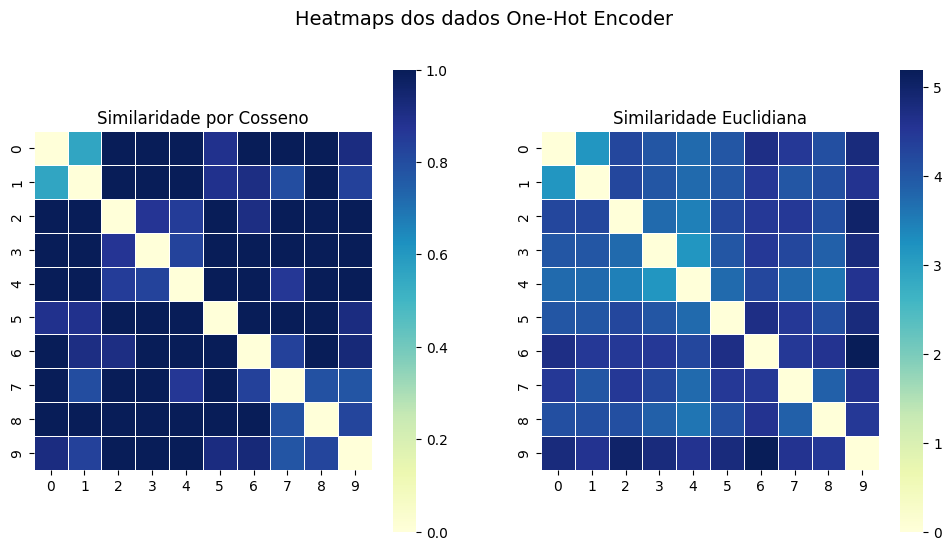

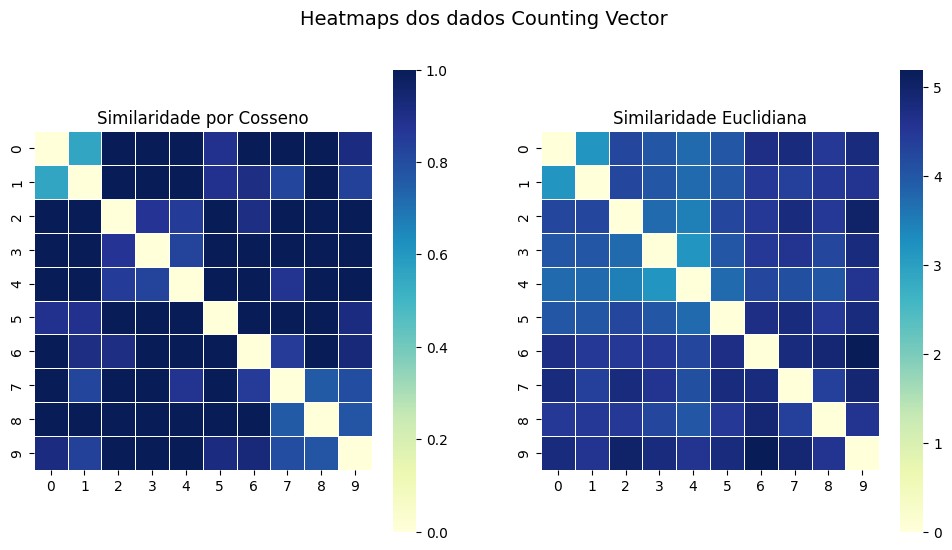

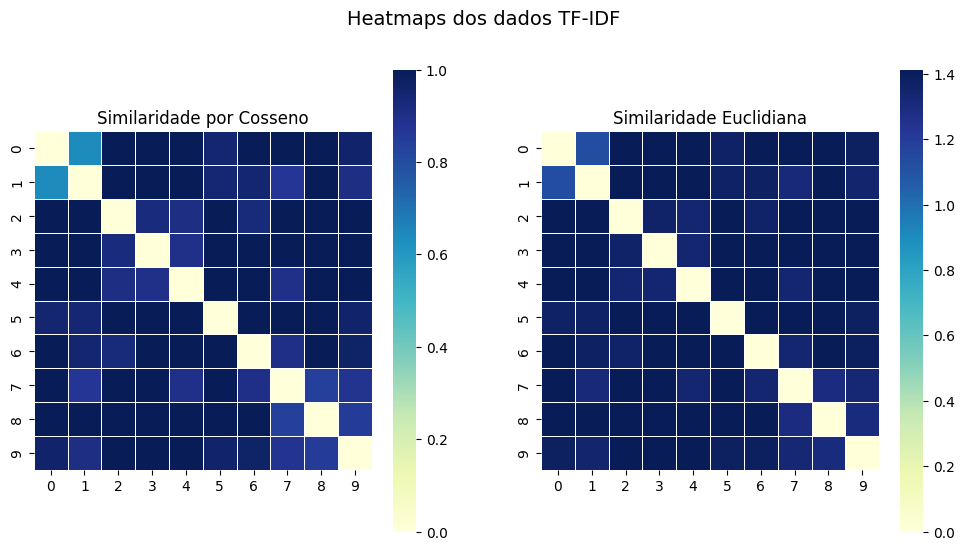

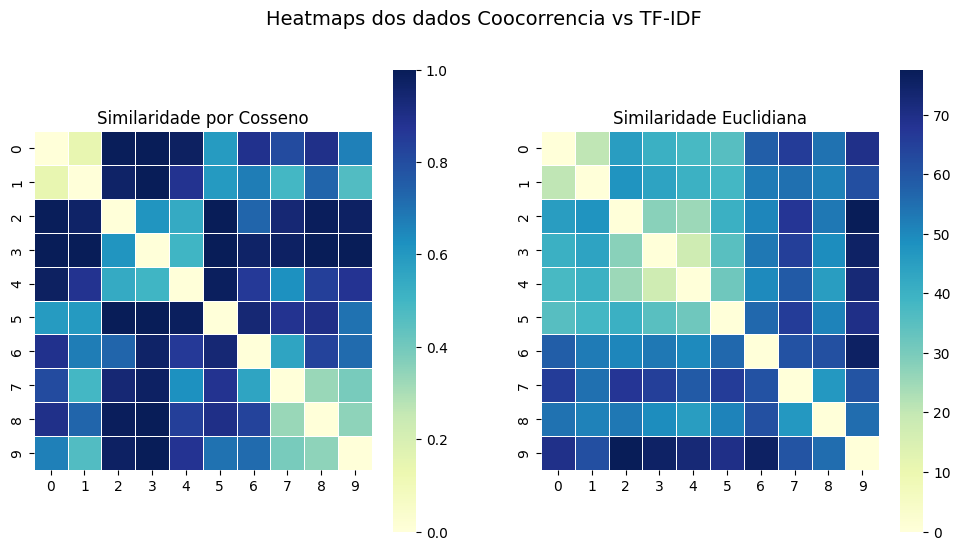

In [140]:
plot_similarity_heatmaps(matriz_onehot, "One-Hot Encoder")
plot_similarity_heatmaps(matriz_count, "Counting Vector")
plot_similarity_heatmaps(matriz_tfidf, "TF-IDF")
plot_similarity_heatmaps(matriz_produto, "Coocorrencia vs TF-IDF")